# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 14.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 7.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 24.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp2 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1337562642756591623
1337562642395893761
1337562642655883265
1337562642836148224
1337562642928504834
1337562642781790210
1337562643033325569
1337562642777575424
1337562643117334529
1337562643075362824
1337562643276722176
1337562643297566727
1337562643318644738
1337562643218001920
1337562643297603590
1337562643415097347
1337562643427553281
1337562643528364032
1337562643540807680
1337562643540787204
1337562643784208386
1337562643838668800
1337562643884875779
1337562643784142850
1337562644102828032
1337562644014882818
1337562644090298370
1337562644014718978
1337562644283154432
1337562644224634882
1337562644333682688
1337562644312690699
1337562644421746690
1337562644182667269
1337562644455145472
1337562644367216641
1337562644119769089
1337562644467814400
1337562644442705922
1337562644719558658
1337562644690186240
1337562644740509696
1337562644962676741
1337562645248028674
1337562645201825795
1337562645336006656
1337562645365460994
1337562645344350208
1337562645549891585
1337562645646495754


1337562678231969792
1337562678399741952
1337562678370381824
1337562678546542592
1337562678374486018
1337562678630510593
1337562678575841280
1337562678634684416
1337562678689222656
1337562678856986624
1337562679150485504
1337562679225937920
1337562679192342530
1337562679234285569
1337562679322480641
1337562679054135296
1337562679431585792
1337562679565684738
1337562679595081728
1337562679783854080
1337562679947325440
1337562680002039808
1337562680043966464
1337562679985188864
1337562679804915712
1337562680262090754
1337562680383602688
1337562680484368384
1337562680521986050
1337562680790568962
1337562680857649152
1337562680757014530
1337562680895418368
1337562680777969667
1337562680966647810
1337562681084022785
1337562681574707200
1337562681776214016
1337562681658789897
1337562681918812161
1337562682086596608
1337562682199842816
1337562682250113024
1337562682300436481
1337562682208227329
1337562682321416192
1337562682371747841
1337562682451496963
1337562682560483330
1337562682560536576


1337562715447906304
1337562715695575041
1337562715708067840
1337562715188047873
1337562715867508738
1337562715838164995
1337562716068859904
1337562716056260608
1337562716182106113
1337562716307922946
1337562716303605762
1337562716223893511
1337562716349853699
1337562716425363462
1337562716618289152
1337562716400214017
1337562716580483073
1337562717008384000
1337562716995645440
1337562716937072642
1337562716995788805
1337562717134094336
1337562717029355530
1337562717113106434
1337562717234708481
1337562717180342274
1337562717356482562
1337562717457162240
1337562717624934400
1337562717708804098
1337562717520064512
1337562717721423872
1337562717796716545
1337562717905952768
1337562718035976193
1337562718073724930
1337562718245511169
1337562718350548994
1337562718350393345
1337562718317010944
1337562718333595649
1337562718518136832
1337562718635745281
1337562718757380099
1337562718862069760
1337562718937747458
1337562719067676673
1337562719336194048
1337562719453466624
1337562719428485122


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Dec 12 01:01:00 +0000 2020'
'Sat Dec 12 01:00:59 +0000 2020'
'Sat Dec 12 01:00:58 +0000 2020'
'Sat Dec 12 01:00:57 +0000 2020'
'Sat Dec 12 01:00:52 +0000 2020'
'Sat Dec 12 01:00:50 +0000 2020'
'Sat Dec 12 01:00:48 +0000 2020'
'Sat Dec 12 01:00:42 +0000 2020'
'Sat Dec 12 01:00:25 +0000 2020'
'Sat Dec 12 01:00:22 +0000 2020'
'Sat Dec 12 01:00:18 +0000 2020'
'Sat Dec 12 01:00:08 +0000 2020'
'Sat Dec 12 00:59:47 +0000 2020'
'Sat Dec 12 00:59:17 +0000 2020'
'Sat Dec 12 00:59:08 +0000 2020'
'Sat Dec 12 00:58:59 +0000 2020'
'Sat Dec 12 00:58:58 +0000 2020'
'Sat Dec 12 00:58:57 +0000 2020'
'Sat Dec 12 00:58:49 +0000 2020'
'Sat Dec 12 00:58:48 +0000 2020'
'Sat Dec 12 00:58:31 +0000 2020'
'Sat Dec 12 00:58:29 +0000 2020'
'Sat Dec 12 00:58:22 +0000 2020'
'Sat Dec 12 00:58:20 +0000 2020'
'Sat Dec 12 00:58:18 +0000 2020'
'Sat Dec 12 00:58:13 +0000 2020'
'Sat Dec 12 00:58:12 +0000 2020'
'Sat Dec 12 00:57:55 +0000 2020'
'Sat Dec 12 00:57:55 +0000 2020'
'Sat Dec 12 00:57:50 +0000 2020'
'Sat Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [ ]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [ ]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

Create a text index and print the Tweets containing specific keywords. 

In [ ]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


Create a cursor to query tweets with the created index

In [ ]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [ ]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#        pprint (document) # use pprint to print the entire tweet document
        
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

In [ ]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [ ]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

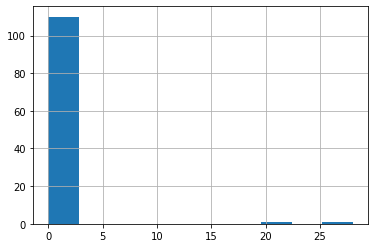

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count